In [3]:
import matplotlib.pyplot as plt
import networkx as nx

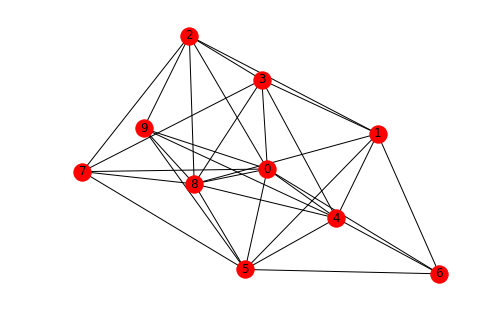

In [4]:
n = 10
p = 0.7
G = nx.gnp_random_graph(n, p, seed=93)
nx.draw(G, with_labels = True)
plt.show()

In [5]:
# Miary sieciowe

# stopień
print(nx.degree(G))
# bliskość
print(nx.closeness_centrality(G))
# pośrednictwo
print(nx.betweenness_centrality(G))
# pagerank
print(nx.pagerank(G))

[(0, 8), (1, 6), (2, 6), (3, 6), (4, 7), (5, 7), (6, 4), (7, 5), (8, 8), (9, 5)]
{0: 0.9, 1: 0.75, 2: 0.75, 3: 0.75, 4: 0.8181818181818182, 5: 0.8181818181818182, 6: 0.6428571428571429, 7: 0.6923076923076923, 8: 0.9, 9: 0.6923076923076923}
{0: 0.09074074074074072, 1: 0.04675925925925925, 2: 0.0324074074074074, 3: 0.02407407407407407, 4: 0.04953703703703703, 5: 0.0625, 6: 0.004629629629629629, 7: 0.011111111111111112, 8: 0.056018518518518516, 9: 0.011111111111111112}
{0: 0.125682779619184, 1: 0.09759848704599473, 2: 0.09724825345266414, 3: 0.09681990982299056, 4: 0.1114909532903837, 5: 0.11179514185509688, 6: 0.06929345735751156, 7: 0.08268920456052786, 8: 0.12487064759070003, 9: 0.08251116540494646}


In [6]:
# Globalne miary sieciowe

# średnia z najkrótszych ścieżek
print(nx.average_shortest_path_length(G))
# średnica
print(nx.diameter(G))
# centralizacja stopni
print(nx.degree_centrality(G))
# gęstość
print(nx.density(G))


1.3111111111111111
2
{0: 0.8888888888888888, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.7777777777777777, 5: 0.7777777777777777, 6: 0.4444444444444444, 7: 0.5555555555555556, 8: 0.8888888888888888, 9: 0.5555555555555556}
0.6888888888888889


In [7]:
from collections import OrderedDict

def compare(graph1, graph2):
    """
    Compare two graphs
    
    Args:
        graph1: First graph to compare
        graph2: Second graph to compare
    
    Returns:
        A dict with calculated diffrence measures
    """
    result = OrderedDict()
    # KS test for graph measurements distributions
    graph1_degree_centrality = list(nx.degree_centrality(graph1).values())
    graph2_degree_centrality = list(nx.degree_centrality(graph2).values())
    result['degree_centrality'] = stats.ks_2samp(graph1_degree_centrality, graph2_degree_centrality)
    
    graph1_closeness_centrality = list(nx.closeness_centrality(graph1).values())
    graph2_closeness_centrality = list(nx.closeness_centrality(graph2).values())
    result['closeness_centrality'] = stats.ks_2samp(graph1_closeness_centrality, graph2_closeness_centrality)
    
    graph1_betweenness_centrality = list(nx.betweenness_centrality(graph1).values())
    graph2_betweenness_centrality = list(nx.betweenness_centrality(graph2).values())
    result['betweenness_centrality'] = stats.ks_2samp(graph1_betweenness_centrality, graph2_betweenness_centrality)
    
    graph1_pagerank = list(nx.pagerank(graph1).values())
    graph2_pagerank = list(nx.pagerank(graph2).values())
    result['pagerank'] = stats.ks_2samp(graph1_pagerank, graph2_pagerank)
    
    # absolute value of global graph measurements subtraction
    result['average_shortest_path_length'] = abs(nx.average_shortest_path_length(graph1) - nx.average_shortest_path_length(graph2))
    result['diameter'] = abs(nx.diameter(graph1) - nx.diameter(graph2))
    result['degree_centrailty'] = '?'
    result['density'] = abs(nx.density(graph1) - nx.density(graph2))
    
    return result

In [38]:
from scipy import stats

n1, p1 = 10, 0.8
n2, p2 = 10, 0.8

graph1 = nx.gnp_random_graph(n1, p1, seed=93)
graph2 = nx.gnp_random_graph(n2, p2, seed=95)

compare(graph1, graph2)

OrderedDict([('degree_centrality',
              Ks_2sampResult(statistic=0.30000000000000004, pvalue=0.67507815371659508)),
             ('closeness_centrality',
              Ks_2sampResult(statistic=0.30000000000000004, pvalue=0.67507815371659508)),
             ('betweenness_centrality',
              Ks_2sampResult(statistic=0.5, pvalue=0.11084033741322809)),
             ('pagerank',
              Ks_2sampResult(statistic=0.40000000000000002, pvalue=0.31285267601695582)),
             ('average_shortest_path_length', 0.11111111111111116),
             ('diameter', 0),
             ('degree_centrailty', '?'),
             ('density', 0.11111111111111116)])

In [9]:
"""
- weź wierzchołek
- policz mu cechy
    - stopień
    - pośrednictwo
    - bliskość
    - pagerank
    
- zrób z tego zbiór uczący
- zbuduj prostą dwuwarstwową sieć neuronową
- naucz sieć na zbiorze
- odpowiedź sieci + priority rank -> nowy graf
- porównaj wygenerowany graf z oryginalnym 
    - wynik porównania - funkcja kosztu sieci neuronowej
"""

'\n- weź wierzchołek\n- policz mu cechy\n    - stopień\n    - pośrednictwo\n    - bliskość\n    - pagerank\n    \n- zrób z tego zbiór uczący\n- zbuduj prostą dwuwarstwową sieć neuronową\n- naucz sieć na zbiorze\n- odpowiedź sieci + priority rank -> nowy graf\n- porównaj wygenerowany graf z oryginalnym \n    - wynik porównania - funkcja kosztu sieci neuronowej\n'

In [43]:
# attach attributes to the node
def attach_attributes(graph):
    degree_centralities = nx.degree_centrality(graph)
    betweenness_centralities = nx.betweenness_centrality(graph)
    closeness_centralities = nx.closeness_centrality(graph)
    pageranks = nx.pagerank(graph)

    for node_id in graph.nodes:
        node_attributes = {
            'degree_centrality': degree_centralities[node_id],
            'betweenness_centrality': betweenness_centralities[node_id],
            'closeness_centrality': closeness_centralities[node_id],
            'pagerank': pageranks[node_id]
        }
        graph.node[node_id].update(node_attributes)

In [45]:
attach_attributes(graph1)
graph1.nodes[0]

{'betweenness_centrality': 0.06507936507936508,
 'closeness_centrality': 0.9,
 'degree_centrality': 0.8888888888888888,
 'pagerank': 0.11598102726055617}